In [2]:
# import the dataset
from quantopian.interactive.data.eventvestor import earnings_guidance_free
from quantopian.interactive.data.zacks import earnings_surprises_free

from odo import odo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
earnings_guidance_free.head(5)

,event_id,trade_date,symbol,event_type,event_headline,event_phase,guidance_content,guidance_gaap,guidance_trend,guidance_quality,fiscal_quarter,eps_low,eps_high,revenue_low,revenue_high,netincome_low,netincome_high,fiscal_year,annual_trend,event_rating,sid,asof_date,timestamp
0,2187657.0,2016-06-02,CONN,Guidance,Conn's Issues 2Q & Lowers FY 17 Guidance,None,Other Financial,GAAP,New,None,2Q 17,0.00,0.00,0.0,0.0,0.0,0.0,FY 17,Lower,1.0,25646,2016-06-02,2016-06-03 11:26:59.485461
1,2187614.0,2016-06-03,OESX,Guidance,Orion Energy Systems Issues FY 17 Guidance,None,EPS & Financial,GAAP,None,None,None,0.00,0.00,0.0,0.0,0.0,0.0,FY 17,New,1.0,49131,2016-06-02,2016-06-03 11:26:59.485461
2,2187589.0,2016-06-03,ZUMZ,Guidance,Zumiez Issues 2Q 16 Guidance,None,EPS & Financial,GAAP,New,None,2Q 16,-0.13,-0.09,172.0,176.0,0.0,0.0,None,None,1.0,27229,2016-06-02,2016-06-03 11:26:59.485461
3,2187519.0,2016-06-03,BV,Guidance,Bazaarvoice Issues 1Q 17 & FY 17 Guidance,None,EPS & Financial,Non-GAAP,New,None,1Q 17,-0.05,-0.03,48.8,49.3,0.0,0.0,FY 17,New,1.0,42551,2016-06-02,2016-06-03 11:26:59.485461
4,2187516.0,2016-06-03,AVGO,Guidance,Broadcom Issues 3Q 16 Guidance,None,Other Financial,GAAP,New,None,3Q 16,0.00,0.00,3665.0,3815.0,0.0,0.0,None,None,1.0,38650,2016-06-02,2016-06-03 11:26:59.485461


In [4]:
dir(earnings_guidance_free)

[u'annual_trend',
 'apply',
 u'asof_date',
 'cast',
 'count',
 'count_values',
 'distinct',
 'drop_field',
 'dshape',
 u'eps_high',
 u'eps_low',
 u'event_headline',
 u'event_id',
 u'event_phase',
 u'event_rating',
 u'event_type',
 'fields',
 u'fiscal_quarter',
 u'fiscal_year',
 u'guidance_content',
 u'guidance_gaap',
 u'guidance_quality',
 u'guidance_trend',
 'head',
 'isidentical',
 'map',
 'ndim',
 'nelements',
 u'netincome_high',
 u'netincome_low',
 'nrows',
 'nunique',
 'peek',
 'relabel',
 u'revenue_high',
 u'revenue_low',
 'sample',
 'schema',
 'shape',
 'shift',
 u'sid',
 'sort',
 u'symbol',
 'tail',
 u'timestamp',
 u'trade_date']

In [5]:
symbol_criteria = (earnings_guidance_free['eps_low'] != 0) & \
                    (earnings_guidance_free['netincome_low'] != 0) & \
                    (earnings_guidance_free['revenue_low'] != 0)
symbols = odo(earnings_guidance_free[symbol_criteria]['symbol'].distinct(), pd.DataFrame)

In [6]:
symbols.shape

(274, 1)

In [7]:
guidance_dict = {}
for i in range(symbols.shape[0]):
    symbol = symbols.iloc[i, 0]
    guidance_dict[symbol] = odo(earnings_guidance_free[earnings_guidance_free['symbol'] == symbol], pd.DataFrame)[['trade_date', 'eps_low', 'eps_high', 'fiscal_quarter']]
guidance_df = pd.concat(guidance_dict)

In [8]:
guidance_df['trade_date'] = pd.to_datetime(guidance_df['trade_date'], format='%Y-%m-%d')
guidance_eps = guidance_df.reset_index().set_index(['level_0', 'trade_date'])
guidance_eps = guidance_eps.drop(['level_1'], axis=1)
guidance_eps.head()

eps_low  eps_high fiscal_quarter
level_0 trade_date                                  
AAOI    2016-08-05     0.16      0.21          3Q 16
        2016-09-07     0.26      0.29          3Q 16
        2016-11-04     0.46      0.51          4Q 16
        2017-01-12     0.70      0.75          4Q 16
        2014-08-13     0.21      0.25          3Q 14

In [9]:
guidance_eps.sort_index().head()

eps_low  eps_high fiscal_quarter
level_0 trade_date                                  
AAOI    2013-11-08     0.04      0.07          4Q 13
        2014-02-28     0.04      0.07          1Q 14
        2014-05-09     0.06      0.13          2Q 14
        2014-08-13     0.21      0.25          3Q 14
        2014-11-11     0.28      0.31          4Q 14

In [10]:
guidance_eps['eps_mid'] = (guidance_eps['eps_low'] + guidance_eps['eps_high']) / 2

In [11]:
earnings_surprises_free.tail(5)

,symbol,comp_name,comp_name_2,exchange,currency_code,per_type,eps_mean_est,eps_act,eps_amt_diff_surp,eps_pct_diff_surp,eps_std_dev_est,eps_cnt_est,eps_act_zacks_adj,per_fisc_year,per_fisc_qtr,per_end_date,per_cal_year,per_cal_qtr,act_rpt_code,act_rpt_desc,act_rpt_date_time,m_ticker,per_code,sid,asof_date,timestamp
0,PROV,PROVIDENT FINL,"Provident Financial Holdings, Inc.",NSDQ,USD,Q,NaN,0.48,NaN,NaN,NaN,0.0,0.00,2001.0,1.0,2000-09-30,2000.0,3.0,None,None,2009-12-01 04:59:59,PRO,None,15196,2009-12-01,2009-12-02
1,GRB,GERBER SCIENTIF,GERBER SCIENTIF,TSXV,USD,Q,NaN,-0.03,NaN,NaN,NaN,NaN,0.00,2001.0,3.0,2001-01-31,2001.0,1.0,None,None,2010-03-05 04:59:59,GRB,None,3332,2010-03-05,2010-03-06
2,DXT,DIXON TICON,DIXON TICON,None,USD,Q,NaN,0.20,NaN,NaN,NaN,0.0,0.49,2001.0,4.0,2001-09-30,2001.0,3.0,None,None,2002-01-16 04:59:59,DIXY,None,2383,2002-01-16,2002-01-17
3,MCCL,MCCLAIN INDS,MCCLAIN INDS,None,USD,Q,NaN,-0.53,NaN,NaN,NaN,0.0,0.00,2001.0,4.0,2001-09-30,2001.0,3.0,None,None,2002-01-16 04:59:59,MCCL,None,4704,2002-01-16,2002-01-17
4,RTK,RENTECH INC,"Rentech, Inc.",NSDQ,USD,Q,NaN,-0.60,NaN,NaN,NaN,0.0,0.00,2001.0,3.0,2001-09-30,2001.0,3.0,None,None,2002-01-01 04:59:59,RNTK,None,6523,2002-01-01,2002-01-02


In [12]:
surprise_dict = {}
for i in range(symbols.shape[0]):
    symbol = symbols.iloc[i, 0]
    surprise_dict[symbol] = odo(earnings_surprises_free[earnings_surprises_free['symbol'] == symbol], pd.DataFrame)[['eps_mean_est', 'eps_act', 'eps_amt_diff_surp', 'per_end_date', 'asof_date', 'per_cal_year', 'per_cal_qtr']]
surprise_df = pd.concat(surprise_dict)

In [13]:
surprise_df['fiscal_quarter'] = surprise_df.apply(lambda row: '%sQ %s' % (int(row['per_cal_qtr']), str(int(row['per_cal_year']))[-2:]), axis=1)
surprise_df.head()

eps_mean_est  eps_act  eps_amt_diff_surp per_end_date  asof_date  \
AAOI 0          0.00     0.05               0.05   2013-09-30 2013-11-08   
     1          0.05    -0.03              -0.08   2013-12-31 2014-02-27   
     2          0.00     0.03               0.03   2014-03-31 2014-05-08   
     3          0.05     0.12               0.07   2014-06-30 2014-08-12   
     4          0.20     0.17              -0.03   2014-09-30 2014-11-10   

        per_cal_year  per_cal_qtr fiscal_quarter  
AAOI 0        2013.0          3.0          3Q 13  
     1        2013.0          4.0          4Q 13  
     2        2014.0          1.0          1Q 14  
     3        2014.0          2.0          2Q 14  
     4        2014.0          3.0          3Q 14

In [21]:
left = guidance_eps.reset_index()
right = surprise_df.reset_index()
join_df = pd.merge(left, right, on=['level_0', 'fiscal_quarter']).set_index(['level_0', 'fiscal_quarter'])

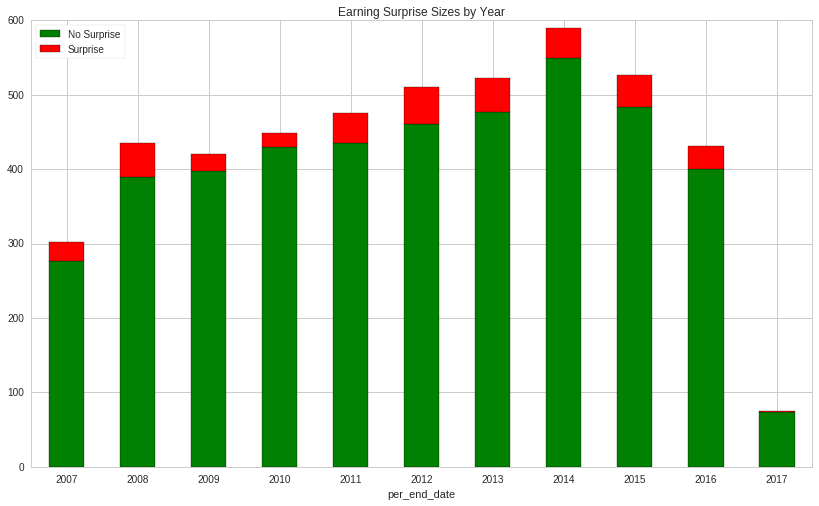

In [122]:
join_df['earnings_surprise'] = join_df.apply(lambda row: 'Surprise' if ((row['eps_low']<row['eps_act']) &\
                    (row['eps_high']>row['eps_act'])) else 'No Surprise', axis=1)
join_df['per_end_date'] = pd.to_datetime(join_df['per_end_date'], format='%Y-%m-%d')
join_df = join_df[(join_df['per_end_date'].dt.year>=2007) & (join_df['per_end_date'].dt.year<=2017)]
join_df.groupby([join_df['per_end_date'].dt.year, 'earnings_surprise']).size().unstack()\
    .plot(kind='bar', stacked=True, rot=0, color=['green', 'red'], title='Earning Surprise Sizes by Year')\
    .legend(loc='upper left')

In [63]:
selected = join_df[(join_df['eps_mid']!=0) &\
                   ((join_df['eps_low']>join_df['eps_act']) |\
                    join_df['eps_high']<join_df['eps_act']) &\
                    (join_df['eps_high'] >= join_df['eps_low']) &\
                  (join_df['eps_high']<=2) &\
                  (join_df['eps_low']>=-1)].loc[:, ['eps_low', 'eps_high', 'eps_act']]

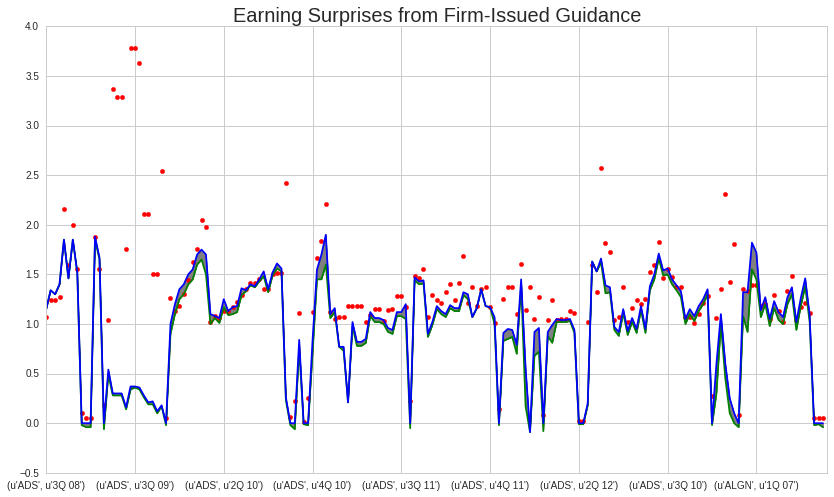

In [104]:
fig, ax = plt.subplots()
x = range(len(selected))
y1 = selected.reset_index()['eps_low']
y2 = selected.reset_index()['eps_high']
ax.plot(x, y1, 'g-', x, y2, 'b-')
ax.fill_between(x, y1, y2, facecolor='grey')
ax.scatter(x=x, y=selected.loc[:, ['eps_act']], color='red')
plt.title('Earning Surprises from Firm-Issued Guidance', fontsize=20)
ax.set_xlim([0, len(selected)])
ax.set_xticklabels(selected.index.values)
plt.show()